## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings(action='once')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import  export_graphviz
import graphviz

from feature_engine.encoding import OneHotEncoder
from feature_engine import transformation as vt
from feature_engine.wrappers import SklearnTransformerWrapper

import scipy.stats as st
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE

C:\Users\vxk200033\Anaconda3\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


## Importing Dataset

In [2]:
df = pd.read_csv("Customer_Churn.csv")

In [3]:
print(df.columns)
print(df.shape)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
(7043, 21)


*This dataset contains data of 7043 customers and their attributes. We have demographics data of customers like gender, age range, senior citizen and if the customers have partners and dependents. We also have data about customer's association with the company, like tenure, if they use phone service and have multiple lines, if the customer uses services like Internet Service, Online security, Online Backup, Device Protection, Tech Supprt, Streaming TV and Movies. Finance related information includes type of contract, if the customer has opted for Paperless Billing, their payment method, monthly charges and total charges. The class/target variable is this dataset is Churn which classifies customers as yes if they are no more associated with the company.<br>
We have some very useful attributes about customers to predict customer churn. For example,<br>
Monthly charges - If the monthly charges are very high, customer might want to switch to another provider.<br>
Contract - If the customers are on short term contract, they are more likely to switch to another provider. If they are long-term contract they would tend to stay with the provider.<br>*

## Exploratory Data Analysis

### Taking a sample of 5 observations

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5703,0795-XCCTE,Male,1,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.40,1809.35,No
1570,3070-FNFZQ,Female,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.40,478.75,No
689,5076-YVXCM,Male,0,No,No,51,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),83.40,4149.45,No
6090,9625-QNLUX,Male,0,Yes,Yes,68,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),103.25,7074.4,No
3036,4702-HDRKD,Male,0,No,No,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),49.35,3321.35,No


In [5]:
df.shape

(7043, 21)

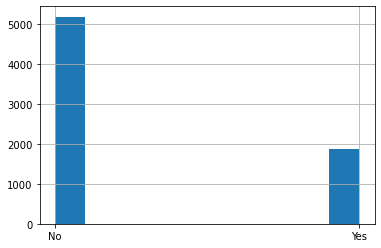

In [6]:
df['Churn'].hist()
plt.show()

*We can see there is an class imbalance in the dependent variable.*

### Preprocessing

*For our analysis we will not require customerID column. Dropping the column.*<br>

In [7]:
df.drop(columns=['customerID'], inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
for var in df.columns:
    print(f"\nNumber of unique values in {var}: {df[var].nunique()}")
    print(df[var].unique())


Number of unique values in gender: 2
['Female' 'Male']

Number of unique values in SeniorCitizen: 2
[0 1]

Number of unique values in Partner: 2
['Yes' 'No']

Number of unique values in Dependents: 2
['No' 'Yes']

Number of unique values in tenure: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Number of unique values in PhoneService: 2
['No' 'Yes']

Number of unique values in MultipleLines: 3
['No phone service' 'No' 'Yes']

Number of unique values in InternetService: 3
['DSL' 'Fiber optic' 'No']

Number of unique values in OnlineSecurity: 3
['No' 'Yes' 'No internet service']

Number of unique values in OnlineBackup: 3
['Yes' 'No' 'No internet service']

Number of unique values in DeviceProtection: 3
['No' 'Yes' 'No internet service']

Number of unique values in TechSupport: 3
['No' 'Yes' 'No internet serv

*We will change values of some columns to better readability and some values seems redundant like in TechSupport No internet service actually means customer has not availed Tech Support. Since we already have observations with No in Internet Service Column, we will replace these values with No.*

In [10]:
df.replace({'Month-to-month':'Monthly', 
            'Electronic check':'Electronic',
            'Mailed check':'Mailed',
            'Bank transfer (automatic)':'Bank transfer',
            'Credit card (automatic)':'Credit card', 
            'No internet service': 'No',
            'No phone service': 'No'
           }, inplace=True)

*We can see that SeniorCitizen is of type* ***int***, *we will change the data type to* ***category.***<br>
*Total charges is of type* ***object***, *we will change the data type to* ***float*** *by converting it to numeric values*.<br>
*We will also change all the columns with* ***object*** *data type to* ***category*** *data type*<br>
*There doesn't seem to be any variable which is of* ***ordinal*** *type*

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
objCols = [var for var in df.columns if df[var].dtype == 'object']
objCols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [14]:
for cols in objCols:
    df[cols] = df[cols].astype('category')
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

### Divide variables into quantitative and qualitative

In [15]:
qual_var = [var for var in df.columns if df[var].dtype.name == 'category' and var != 'Churn']
quan_var = [var for var in df.columns if df[var].dtype.name != 'category']
print(qual_var)
print(quan_var)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


### Check for NA/NULL Values

In [16]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [17]:
from IPython.display import Markdown as md
md(f"*We have {df['TotalCharges'].isnull().sum()} observations with NULL values which is {round(df['TotalCharges'].isnull().sum()/df.shape[0]*100,2)}% of all the observations, we can drop these rows as dropping them will not affect our analysis.*")

*We have 11 observations with NULL values which is 0.16% of all the observations, we can drop these rows as dropping them will not affect our analysis.*

### Drop observations with NA values

In [18]:
df = df.dropna()

In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


*Mean tenure is 32 months, mean monthly charges is \\$65 and mean total charges for each customer is \\$2283 which is marginally higher than average monthly times average tenure.*

In [20]:
def chiSqTest(var1,var2,a):
    chi2, p, degf, expected = st.chi2_contingency(pd.crosstab(var1,var2))
    print('Observed\n')
    print(pd.crosstab(var1,var2))
    print('Expected\n')
    print(expected)
    print(f'chi^2 = {chi2:.4f}\n')
    print(f'p     = {p:.4f}\n')
    if p < a:
        print('P is less than alpha. We reject the null hypothesis.\n')
    else:
        print('P is more than alpha. We cannot reject the null hypothesis.')

In [21]:
for var in qual_var:
    print(f"\nDoes {var} reduce churn?\nNull hypothesis: Churn is independent from {var}\nAlternative hypothesis: churn is dependent on {var}")
    chiSqTest(df[var],df['Churn'],0.05)


Does gender reduce churn?
Null hypothesis: Churn is independent from gender
Alternative hypothesis: churn is dependent on gender
Observed

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930
Expected

[[2557.27090444  925.72909556]
 [2605.72909556  943.27090444]]
chi^2 = 0.4755

p     = 0.4905

P is more than alpha. We cannot reject the null hypothesis.

Does SeniorCitizen reduce churn?
Null hypothesis: Churn is independent from SeniorCitizen
Alternative hypothesis: churn is dependent on SeniorCitizen
Observed

Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476
Expected

[[4324.52645051 1565.47354949]
 [ 838.47354949  303.52645051]]
chi^2 = 158.4408

p     = 0.0000

P is less than alpha. We reject the null hypothesis.


Does Partner reduce churn?
Null hypothesis: Churn is independent from Partner
Alternative hypothesis: churn is dependent on Partner
Observed

Churn      No   Yes
Partner            
No       2439 

In [22]:
def tTests(var1,var2,a):
    a = 0.05
    print(f'Var1 = {var1.var():.3f}\n')
    print(f'Var2 = {var2.var():.3f}\n')
    stat, p = st.ttest_ind(var1,var2)
    p *= 2
    print(f'statistic = {stat:.3f}\n')
    print(f'p_value = {p:.3f}\n')
    if p < a:
        print('P is less than alpha. We reject the null hypothesis.\n')
    if p > a:
        print('P is more than alpha. We fail to reject the null hypothesis.\n')

In [23]:
for var in quan_var:
    var1 = df[df['Churn']=="Yes"][var]
    var2 = df[df['Churn']=="No"][var]
    print(f"\nDoes {var} has any effect on churn?\nNull hypothesis: Churn is independent from {var}\nAlternative hypothesis: churn is dependent on {var}")
    tTests(var1,var2,0.05)


Does tenure has any effect on churn?
Null hypothesis: Churn is independent from tenure
Alternative hypothesis: churn is dependent on tenure
Var1 = 381.465

Var2 = 579.699

statistic = -31.741

p_value = 0.000

P is less than alpha. We reject the null hypothesis.


Does MonthlyCharges has any effect on churn?
Null hypothesis: Churn is independent from MonthlyCharges
Alternative hypothesis: churn is dependent on MonthlyCharges
Var1 = 608.414

Var2 = 966.871

statistic = 16.480

p_value = 0.000

P is less than alpha. We reject the null hypothesis.


Does TotalCharges has any effect on churn?
Null hypothesis: Churn is independent from TotalCharges
Alternative hypothesis: churn is dependent on TotalCharges
Var1 = 3575211.596

Var2 = 5426369.838

statistic = -17.069

p_value = 0.000

P is less than alpha. We reject the null hypothesis.



In [24]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 3))
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df['Churn'], y=df[variable])
    plt.title('Boxplot')
    plt.subplot(1, 3, 3)
    st.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')
    plt.show()

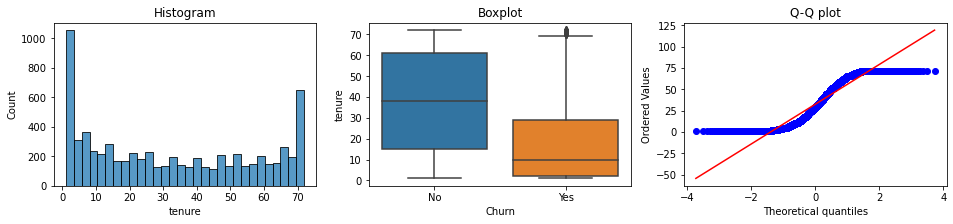

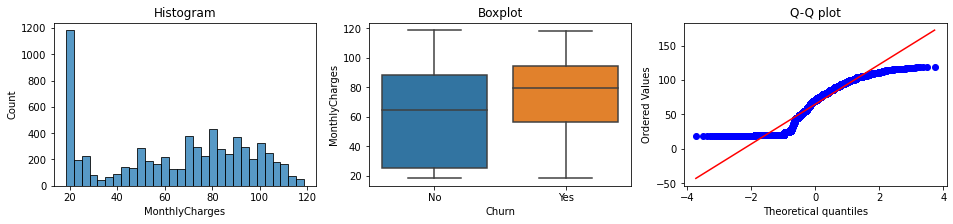

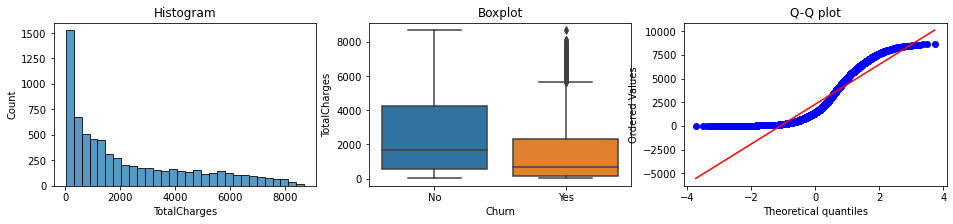

In [25]:
for var in quan_var:
    diagnostic_plots(df,var)

Count plot for gender


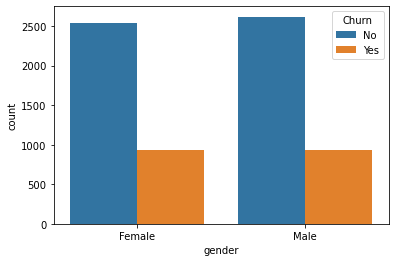

Count plot for SeniorCitizen


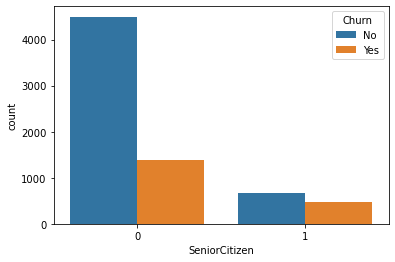

Count plot for Partner


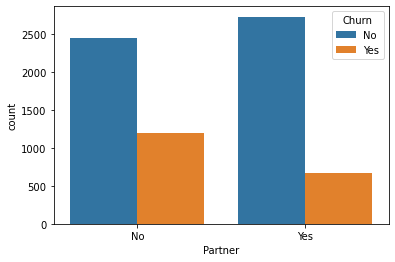

Count plot for Dependents


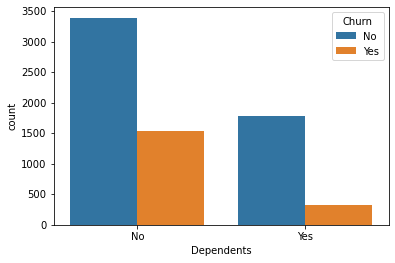

Count plot for PhoneService


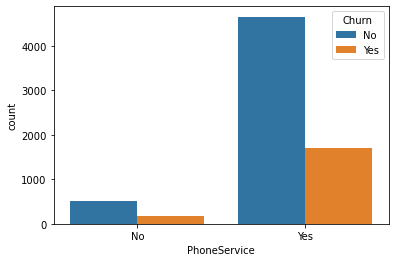

Count plot for MultipleLines


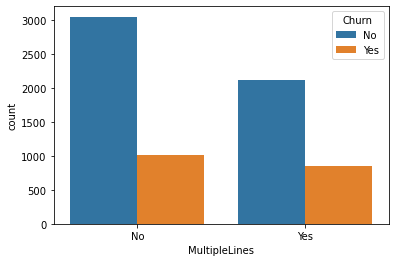

Count plot for InternetService


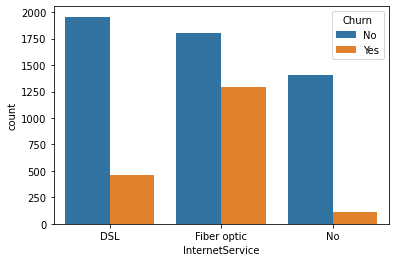

Count plot for OnlineSecurity


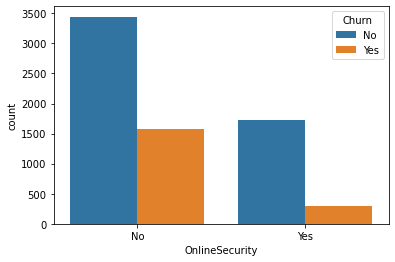

Count plot for OnlineBackup


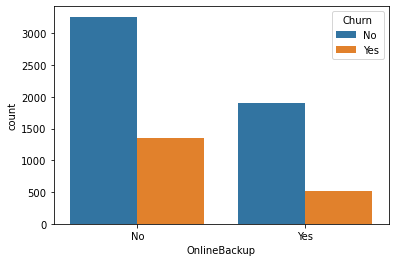

Count plot for DeviceProtection


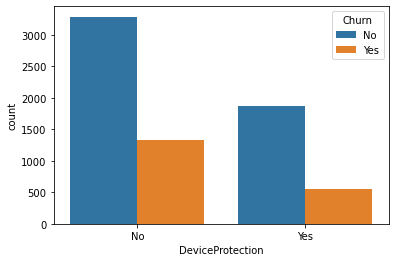

Count plot for TechSupport


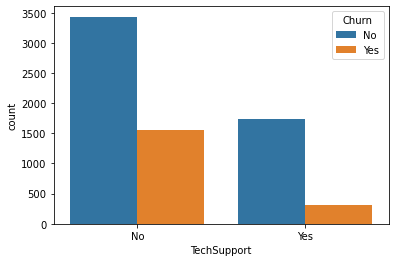

Count plot for StreamingTV


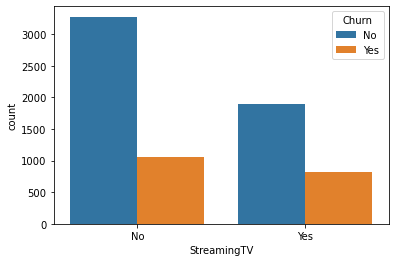

Count plot for StreamingMovies


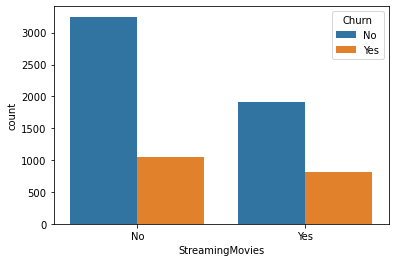

Count plot for Contract


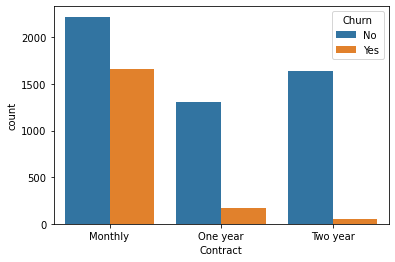

Count plot for PaperlessBilling


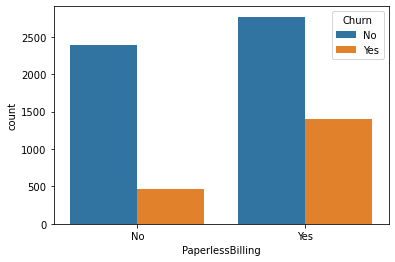

Count plot for PaymentMethod


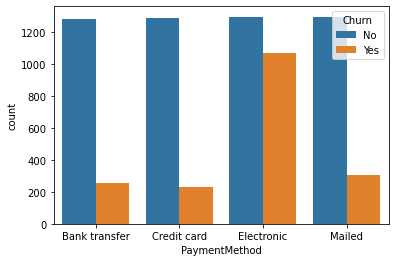

In [26]:
for var in qual_var:
    print(f"Count plot for {var}")
    ax = sns.countplot(x=df[var], hue=df['Churn'])
    plt.show()

### Observations
* *Gender distribution shows there relatively equal number of Male and Female who stayed with the provider and who choose to discontinue the service*<br>
* *Most of the customers are not Senior Citizens*<br>
* *Customers who have partners are marginally higher than customers who don\'t. And customer who have dependents are relatively lower than customers who don\'t.*<br>
* *Most of the customers uses Phone Service, does not have multiple lines, uses either DSL or Fiber optics, and have internet services*<br>
* *While most customers are on monthly plans, there\'s almost equal distribution of customers on long term plans.*<br>
* *Most customers prefer paperless billing and uses Electronic mode of payment. Also, the customers who churned are most in this segment.*<br>

### Correlation between independent variables

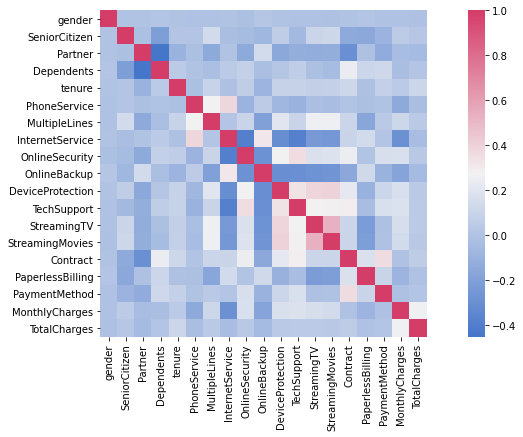

In [27]:
corr = df.drop(columns=['Churn']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')
plt.figure(figsize=(15,6))
cmap = sns.diverging_palette(255, 0, as_cmap=True)
sns.heatmap(corr, square=True, cmap=cmap)
plt.show()

*We can see that none of the independent variables have a very high correlation. StreamingTV and StreamMovies have maximum correlation of 0.53.*

### Correlation between quantitative variables

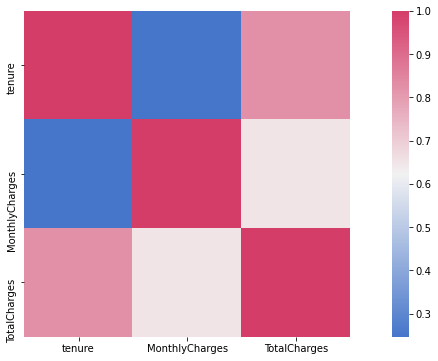

In [28]:
corr_quan = df[quan_var].corr()
plt.figure(figsize=(15,6))
cmap = sns.diverging_palette(255, 0, as_cmap=True)
sns.heatmap(corr_quan, square=True, cmap=cmap)
plt.show()

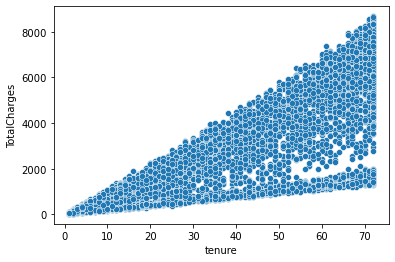

In [29]:
sns.scatterplot(x= df['tenure'], y=df['TotalCharges'])
plt.show()

### Check for outliers in quantitative variables

In [30]:
df[quan_var].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [31]:
Q1 = df[quan_var].quantile(0.25)
Q3 = df[quan_var].quantile(0.75)
IQR = Q3 - Q1
((df[quan_var] < Q1 - (1.5 * IQR)) | (df[quan_var] > Q3 + (1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [32]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### Learning Curve Function

In [33]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.2, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       random_state=123)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    return plt

### Functions for metrics

In [34]:
def confusion_matrix_plot(X_test, y_test, classifier, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
def roc_curve_plot(X_test, y_test, classifier, classifier_name):
    y_pred_prob = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
def metrics(X_train, y_train, X_test, y_test, y_pred, y_prob, classifier, classifier_name):
    print(f'{classifier_name} Metrics')
    acc_train = classifier.score(X_train, y_train)
    acc_test = classifier.score(X_test, y_test)
    pre_test = precision_score(y_test, y_pred)
    rec_test = recall_score(y_test, y_pred)
    roc_test = roc_auc_score(y_test, y_prob[:, 1])
    f1_test = f1_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
    auc_test = auc(recall, precision)
    print(f'Accuracy (Train): {acc_train}')
    print(f'Accuracy (Test): {acc_test}')
    print(f'Precision (Test): {pre_test}')
    print(f'Recall (Test): {rec_test}')
    print(f'ROC AUC Score (Test): {roc_test}')
    print(f'F1 Score (Test): {f1_test}')
    print(f'AUC Score (Test): {auc_test}')
    out = [acc_train, acc_test, pre_test, rec_test, roc_test, f1_test, auc_test]
    return out
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_prob, classifier_name):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()

### Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']), df['Churn'], test_size=0.3, random_state=123, stratify = df['Churn'])

#### Preprocessing

In [36]:
encoder = OneHotEncoder(drop_last=True, variables=qual_var)
tf = vt.YeoJohnsonTransformer(variables=quan_var)
scaler = SklearnTransformerWrapper(transformer=MinMaxScaler(), variables=quan_var)

In [37]:
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [38]:
tf.fit(X_train)
X_train = tf.transform(X_train)
X_test = tf.transform(X_test)

In [39]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logit Model

In [40]:
X_train_c = sm.add_constant(X_train)
logit_model = sm.Logit(y_train,X_train_c)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.406094
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.2986
Time:                        00:42:19   Log-Likelihood:                -1998.8
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5855      1.254      1.264      0.206   

8 iterations has been done to find the optimized model<br>
coef : the coefficients of the independent variables in the regression equation.<br>
Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.<br>
LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).<br>
Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.<br>

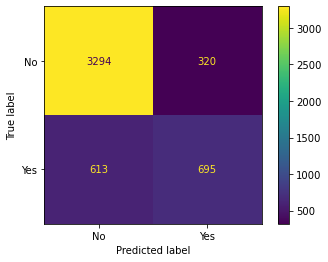

Accuracy: 0.8104429093864283
Precision: 0.6847290640394089
Recall: 0.5313455657492355
F1 Score: 0.5983641842445114
ROC AUC: 0.7214005083865158


In [41]:
prediction = list(map(round, result.predict(sm.add_constant(X_train))))
ConfusionMatrixDisplay(confusion_matrix(y_train, prediction), display_labels=['No','Yes']).plot()
plt.show()
print(f'Accuracy: {accuracy_score(y_train, prediction)}')
print(f'Precision: {precision_score(y_train, prediction)}')
print(f'Recall: {recall_score(y_train, prediction)}')
print(f'F1 Score: {f1_score(y_train, prediction)}')
print(f'ROC AUC: {roc_auc_score(y_train, prediction)}')

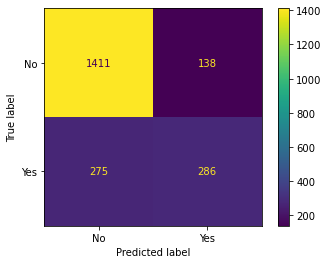

Accuracy: 0.8042654028436019
Precision: 0.6745283018867925
Recall: 0.5098039215686274
F1 Score: 0.5807106598984771
ROC AUC: 0.7103570931277611


In [42]:
prediction = list(map(round, result.predict(sm.add_constant(X_test))))
ConfusionMatrixDisplay(confusion_matrix(y_test, prediction), display_labels=['No','Yes']).plot()
plt.show()
print(f'Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Precision: {precision_score(y_test, prediction)}')
print(f'Recall: {recall_score(y_test, prediction)}')
print(f'F1 Score: {f1_score(y_test, prediction)}')
print(f'ROC AUC: {roc_auc_score(y_test, prediction)}')

In [43]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3614, 1308], dtype=int64))

In [44]:
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [45]:
np.unique(y_train_res, return_counts=True)

(array([0, 1], dtype=int64), array([3614, 3614], dtype=int64))

### Logit after oversampling

In [46]:
X_train_res_c = sm.add_constant(X_train_res)
logit_model_os = sm.Logit(y_train_res,X_train_res_c)
result1 = logit_model_os.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.427704
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7228
Model:                          Logit   Df Residuals:                     7204
Method:                           MLE   Df Model:                           23
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.3830
Time:                        00:42:19   Log-Likelihood:                -3091.4
converged:                       True   LL-Null:                       -5010.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.5723      0.417      8.571      0.000   

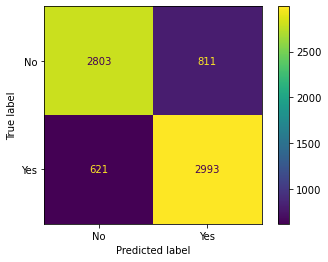

Accuracy: 0.8018815716657444
Precision: 0.7868033648790747
Recall: 0.8281682346430548
F1 Score: 0.8069560528444325
ROC AUC: 0.8018815716657444


In [47]:
prediction = list(map(round, result1.predict(sm.add_constant(X_train_res))))
#print(prediction)
ConfusionMatrixDisplay(confusion_matrix(y_train_res, prediction), display_labels=['No','Yes']).plot()
plt.show()
print(f'Accuracy: {accuracy_score(y_train_res, prediction)}')
print(f'Precision: {precision_score(y_train_res, prediction)}')
print(f'Recall: {recall_score(y_train_res, prediction)}')
print(f'F1 Score: {f1_score(y_train_res, prediction)}')
print(f'ROC AUC: {roc_auc_score(y_train_res, prediction)}')

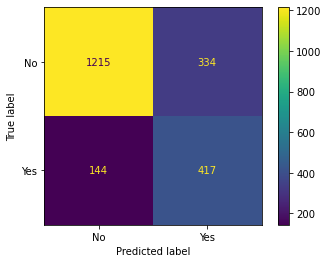

Accuracy: 0.7734597156398104
Precision: 0.5552596537949401
Recall: 0.7433155080213903
F1 Score: 0.635670731707317
ROC AUC: 0.7638462627259953


In [48]:
prediction = list(map(round, result1.predict(sm.add_constant(X_test))))
#print(prediction)
ConfusionMatrixDisplay(confusion_matrix(y_test, prediction), display_labels=['No','Yes']).plot()
plt.show()
print(f'Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Precision: {precision_score(y_test, prediction)}')
print(f'Recall: {recall_score(y_test, prediction)}')
print(f'F1 Score: {f1_score(y_test, prediction)}')
print(f'ROC AUC: {roc_auc_score(y_test, prediction)}')

#### KNN Classifier

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

C:\Users\vxk200033\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\vxk200033\Anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


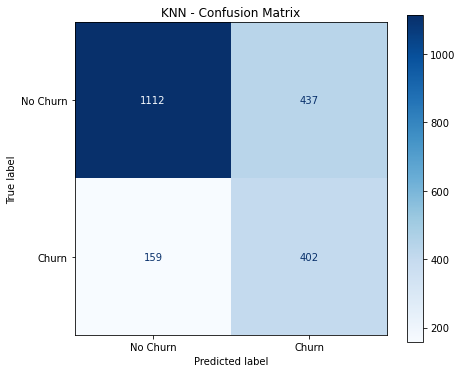

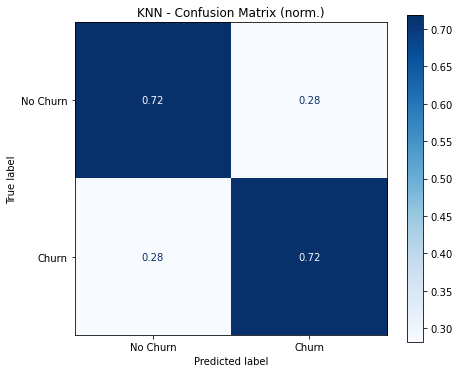

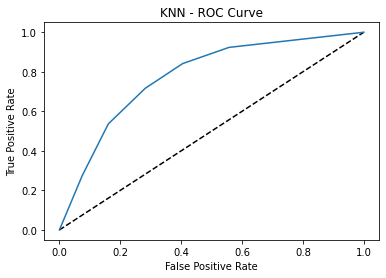

KNN Metrics
Accuracy (Train): 0.8680132816823465
Accuracy (Test): 0.7175355450236967
Precision (Test): 0.4791418355184744
Recall (Test): 0.7165775401069518
ROC AUC Score (Test): 0.7770161647615792
F1 Score (Test): 0.5742857142857143
AUC Score (Test): 0.5686042469804069


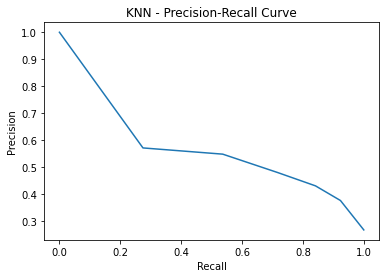

In [50]:
warnings.filterwarnings('ignore')
confusion_matrix_plot(X_test, y_test, knn, 'KNN')
roc_curve_plot(X_test, y_test, knn, 'KNN')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_knn, y_pred_knn_prob, knn, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

#### Logistic Regression

In [51]:
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

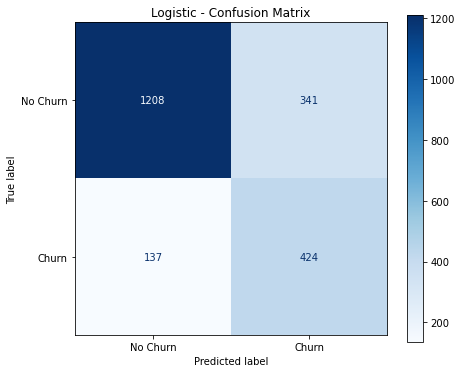

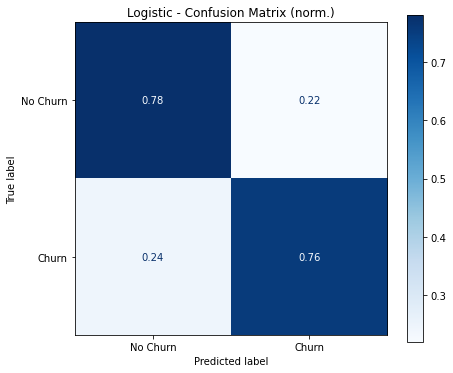

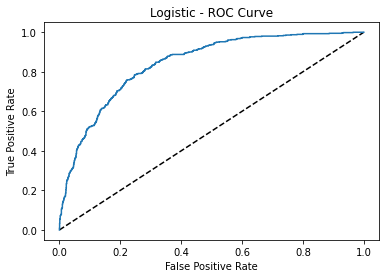

Logistic Metrics
Accuracy (Train): 0.8002213613724405
Accuracy (Test): 0.7734597156398104
Precision (Test): 0.5542483660130719
Recall (Test): 0.7557932263814616
ROC AUC Score (Test): 0.8419180219772633
F1 Score (Test): 0.6395173453996984
AUC Score (Test): 0.6513731461172766


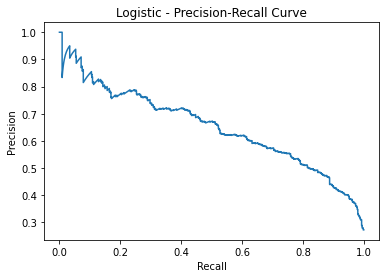

In [52]:
warnings.filterwarnings('ignore')
confusion_matrix_plot(X_test, y_test, logreg, 'Logistic')
roc_curve_plot(X_test, y_test, logreg, 'Logistic')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_logreg, y_pred_logreg_prob, logreg, 'Logistic')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Logistic')

In [53]:
coeff = pd.DataFrame(np.vstack([X_train_res.columns,logreg.coef_]).T,columns=['Variables','Coefficients'])
intercept = pd.DataFrame(np.vstack(["Intercept",logreg.intercept_]).T,columns=['Variables','Coefficients'])
pd.concat([intercept,coeff],axis=0).reset_index().drop(columns=['index'])

,Variables,Coefficients
0,Intercept,3.159511527327471
1,tenure,-0.737838
2,MonthlyCharges,-0.030481
3,TotalCharges,-3.167605
4,gender_Female,-0.126686
5,SeniorCitizen_0,-0.288252
6,Partner_Yes,-0.138615
7,Dependents_Yes,-0.328294
8,PhoneService_No,-0.061235
9,MultipleLines_No,-0.531454


#### Decision Tree

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)

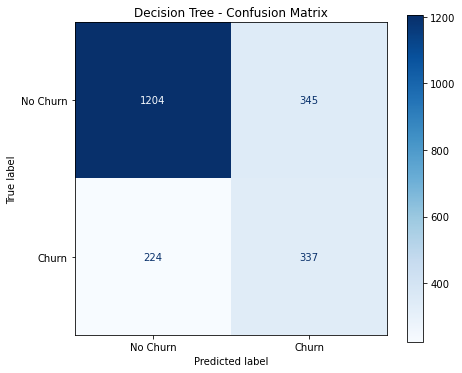

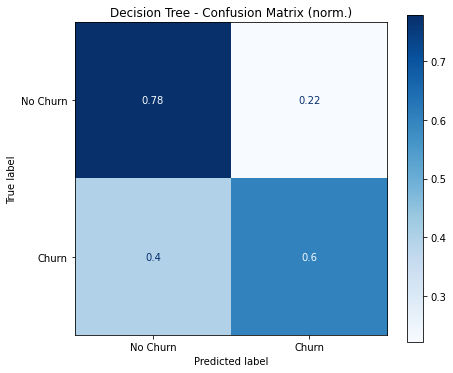

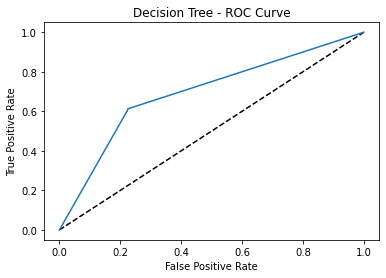

Decision Tree Metrics
Accuracy (Train): 0.9982014388489209
Accuracy (Test): 0.7303317535545024
Precision (Test): 0.4941348973607038
Recall (Test): 0.6007130124777184
ROC AUC Score (Test): 0.6933971546245119
F1 Score (Test): 0.5422365245374096
AUC Score (Test): 0.6024589129469946


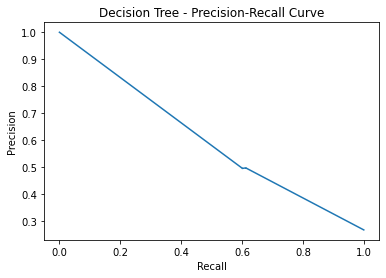

In [55]:
warnings.filterwarnings('ignore')
confusion_matrix_plot(X_test, y_test, dt, 'Decision Tree')
roc_curve_plot(X_test, y_test, dt, 'Decision Tree')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_dt, y_pred_dt_prob, dt, 'Decision Tree')
precision_recall_curve_and_scores(X_test, y_test, y_pred_dt, y_pred_dt_prob, 'Decision Tree')

#### Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

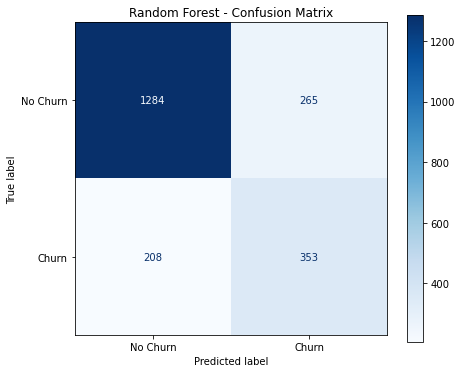

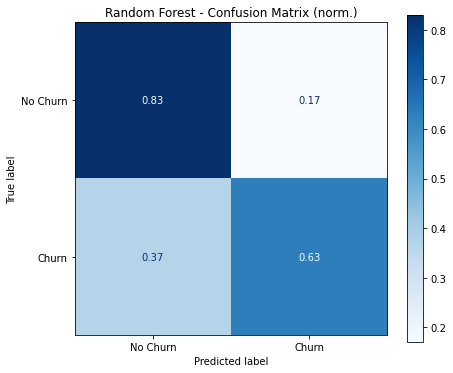

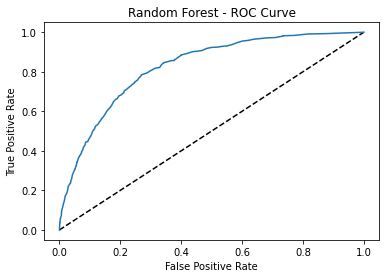

Random Forest Metrics
Accuracy (Train): 0.9982014388489209
Accuracy (Test): 0.7758293838862559
Precision (Test): 0.5711974110032363
Recall (Test): 0.6292335115864528
ROC AUC Score (Test): 0.8243861544852695
F1 Score (Test): 0.5988125530110264
AUC Score (Test): 0.6189982030179254


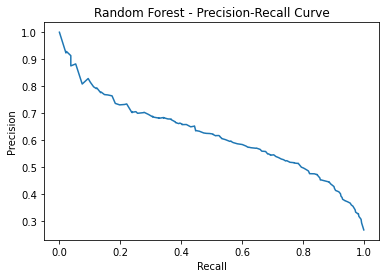

In [57]:
warnings.filterwarnings('ignore')
confusion_matrix_plot(X_test, y_test, rf, 'Random Forest')
roc_curve_plot(X_test, y_test, rf, 'Random Forest')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_rf, y_pred_rf_prob, rf, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

### Hyperparameter tuning

#### KNN Classifier

In [58]:
param_grid_knn = {"n_neighbors": np.arange(1,30)}
knn = KNeighborsClassifier()
knn = GridSearchCV(knn, param_grid_knn, cv = 5, return_train_score=True)
#knn = RandomizedSearchCV(knn, param_grid_knn, cv = 5, return_train_score=True, n_jobs=-1, random_state=123, n_iter= 100)
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

Best Estimator: KNeighborsClassifier(n_neighbors=3)


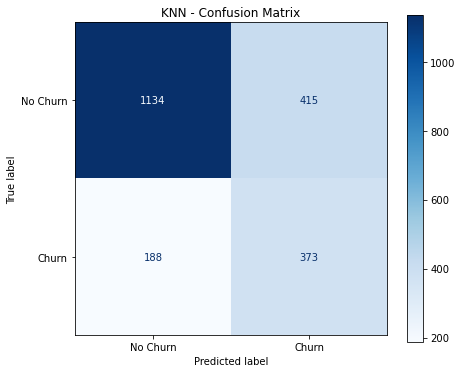

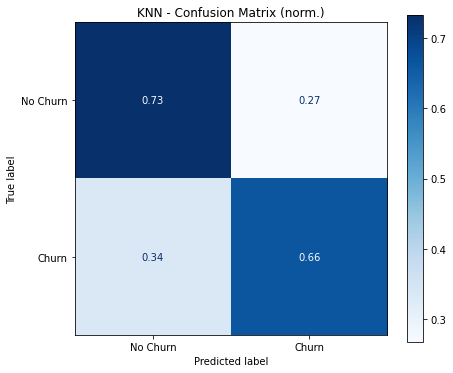

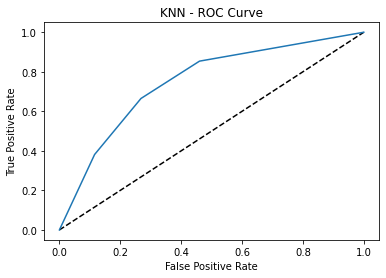

KNN Metrics
Accuracy (Train): 0.9037078029883785
Accuracy (Test): 0.714218009478673
Precision (Test): 0.4733502538071066
Recall (Test): 0.6648841354723708
ROC AUC Score (Test): 0.7480957756657449
F1 Score (Test): 0.553002223869533
AUC Score (Test): 0.5703173864683796


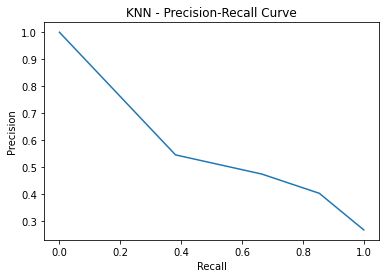

<module 'matplotlib.pyplot' from 'C:\\Users\\vxk200033\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

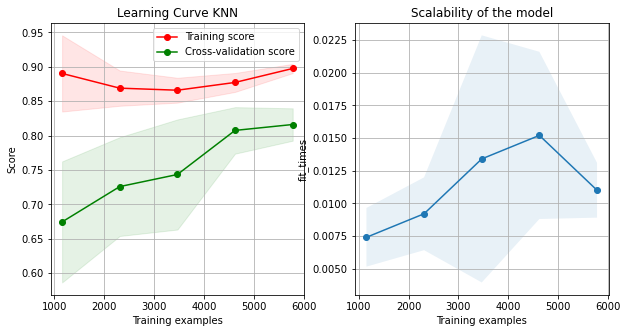

In [59]:
warnings.filterwarnings('ignore')
print(f'Best Estimator: {knn.best_estimator_}')
confusion_matrix_plot(X_test, y_test, knn, 'KNN')
roc_curve_plot(X_test, y_test, knn, 'KNN')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_knn, y_pred_knn_prob, knn, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')
plot_learning_curve(knn.best_estimator_,'Learning Curve KNN',X_train_res,y_train_res,n_jobs=-1)

#### Logistic Regression

In [60]:
warnings.filterwarnings('ignore')
param_grid_logreg = {"penalty": ['l1', 'l2'], 
                     "C": np.arange(.1, 5, .1), 
                     "max_iter": np.logspace(0,3,4)}
logreg = LogisticRegression(random_state=123)
logreg = GridSearchCV(logreg, param_grid_logreg, cv = 5, return_train_score=True)
#logreg = RandomizedSearchCV(logreg, param_grid_logreg, cv = 5, return_train_score=True, n_jobs=-1, random_state=123, n_iter= 100)
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

Best Estimator: LogisticRegression(C=4.9, max_iter=100.0, random_state=123)


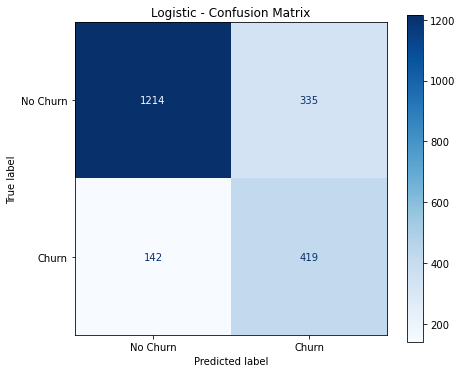

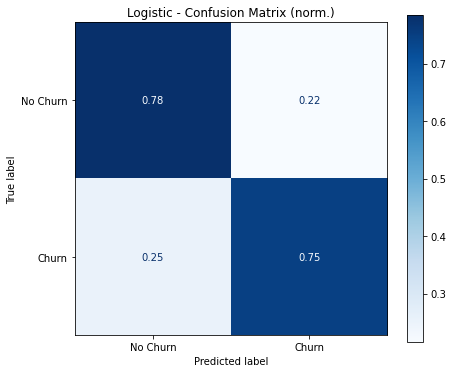

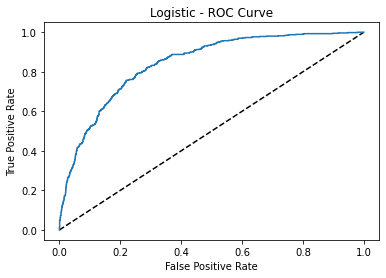

Logistic Metrics
Accuracy (Train): 0.8010514665190924
Accuracy (Test): 0.7739336492890996
Precision (Test): 0.5557029177718833
Recall (Test): 0.7468805704099821
ROC AUC Score (Test): 0.8417074324300997
F1 Score (Test): 0.6372623574144487
AUC Score (Test): 0.6518863325681217


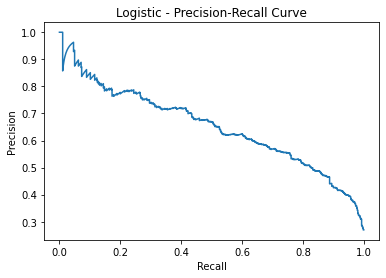

<module 'matplotlib.pyplot' from 'C:\\Users\\vxk200033\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

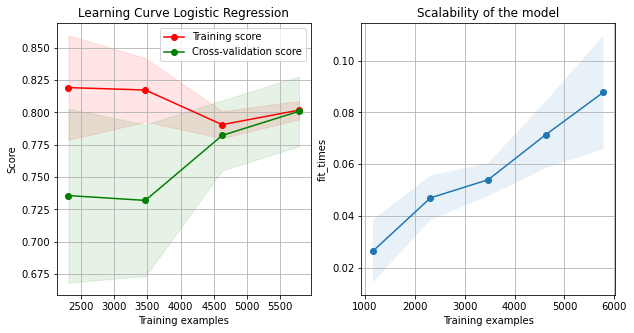

In [61]:
print(f'Best Estimator: {logreg.best_estimator_}')
confusion_matrix_plot(X_test, y_test, logreg, 'Logistic')
roc_curve_plot(X_test, y_test, logreg, 'Logistic')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_logreg, y_pred_logreg_prob, logreg, 'Logistic')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Logistic')
plot_learning_curve(logreg.best_estimator_,'Learning Curve Logistic Regression',X_train_res,y_train_res,n_jobs=-1)

#### Decision Tree

In [62]:
warnings.filterwarnings('ignore')
param_grid_dt = {"max_depth": np.arange(2,40,2), 
                 "min_samples_leaf": np.arange(2,40,2), 
                 "min_samples_split": np.arange(2,40,2), 
                 "max_leaf_nodes": np.arange(2,40,2),
                 "min_impurity_decrease": np.logspace(-5,0,10)}
dt = DecisionTreeClassifier(random_state=123)
#dt = GridSearchCV(dt, param_grid_dt, cv = 5, return_train_score=True)
dt = RandomizedSearchCV(dt, param_grid_dt, cv = 5, return_train_score=True, n_jobs=-1, random_state=123, n_iter= 100)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)

Best Estimator: DecisionTreeClassifier(max_depth=20, max_leaf_nodes=34,
                       min_impurity_decrease=0.0004641588833612782,
                       min_samples_leaf=6, min_samples_split=18,
                       random_state=123)


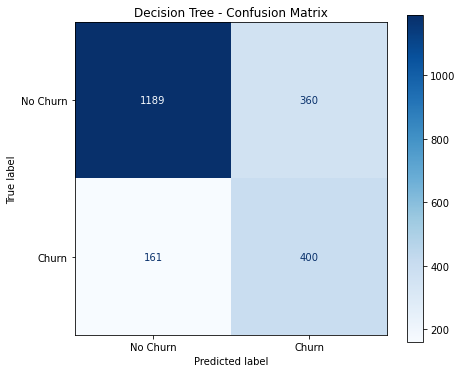

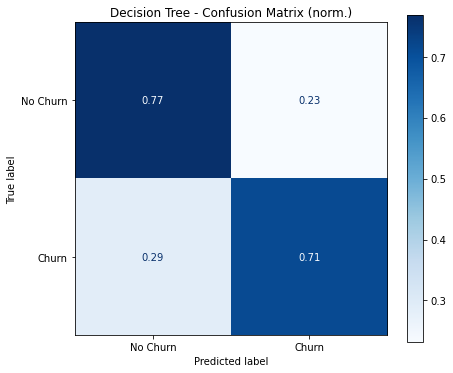

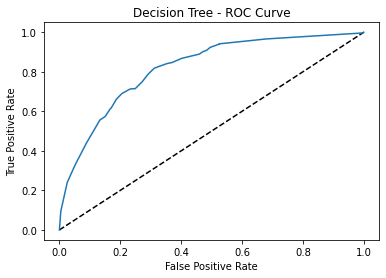

Decision Tree Metrics
Accuracy (Train): 0.8094908688433868
Accuracy (Test): 0.7530805687203791
Precision (Test): 0.5263157894736842
Recall (Test): 0.7130124777183601
ROC AUC Score (Test): 0.8196237236604836
F1 Score (Test): 0.6056018168054504
AUC Score (Test): 0.6344020644256329


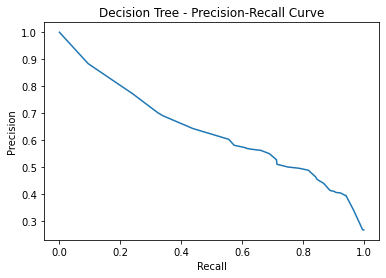

<module 'matplotlib.pyplot' from 'C:\\Users\\vxk200033\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

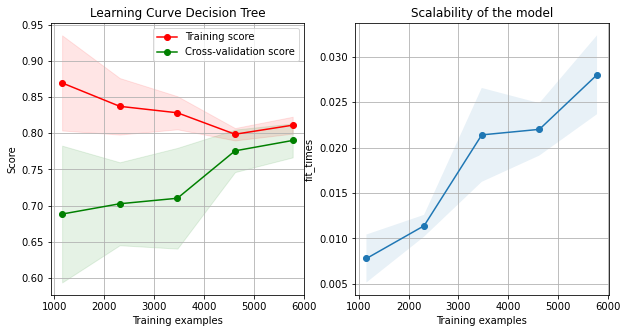

In [63]:
print(f'Best Estimator: {dt.best_estimator_}')
confusion_matrix_plot(X_test, y_test, dt, 'Decision Tree')
roc_curve_plot(X_test, y_test, dt, 'Decision Tree')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_dt, y_pred_dt_prob, dt, 'Decision Tree')
precision_recall_curve_and_scores(X_test, y_test, y_pred_dt, y_pred_dt_prob, 'Decision Tree')
plot_learning_curve(dt.best_estimator_,'Learning Curve Decision Tree',X_train_res,y_train_res,n_jobs=-1)

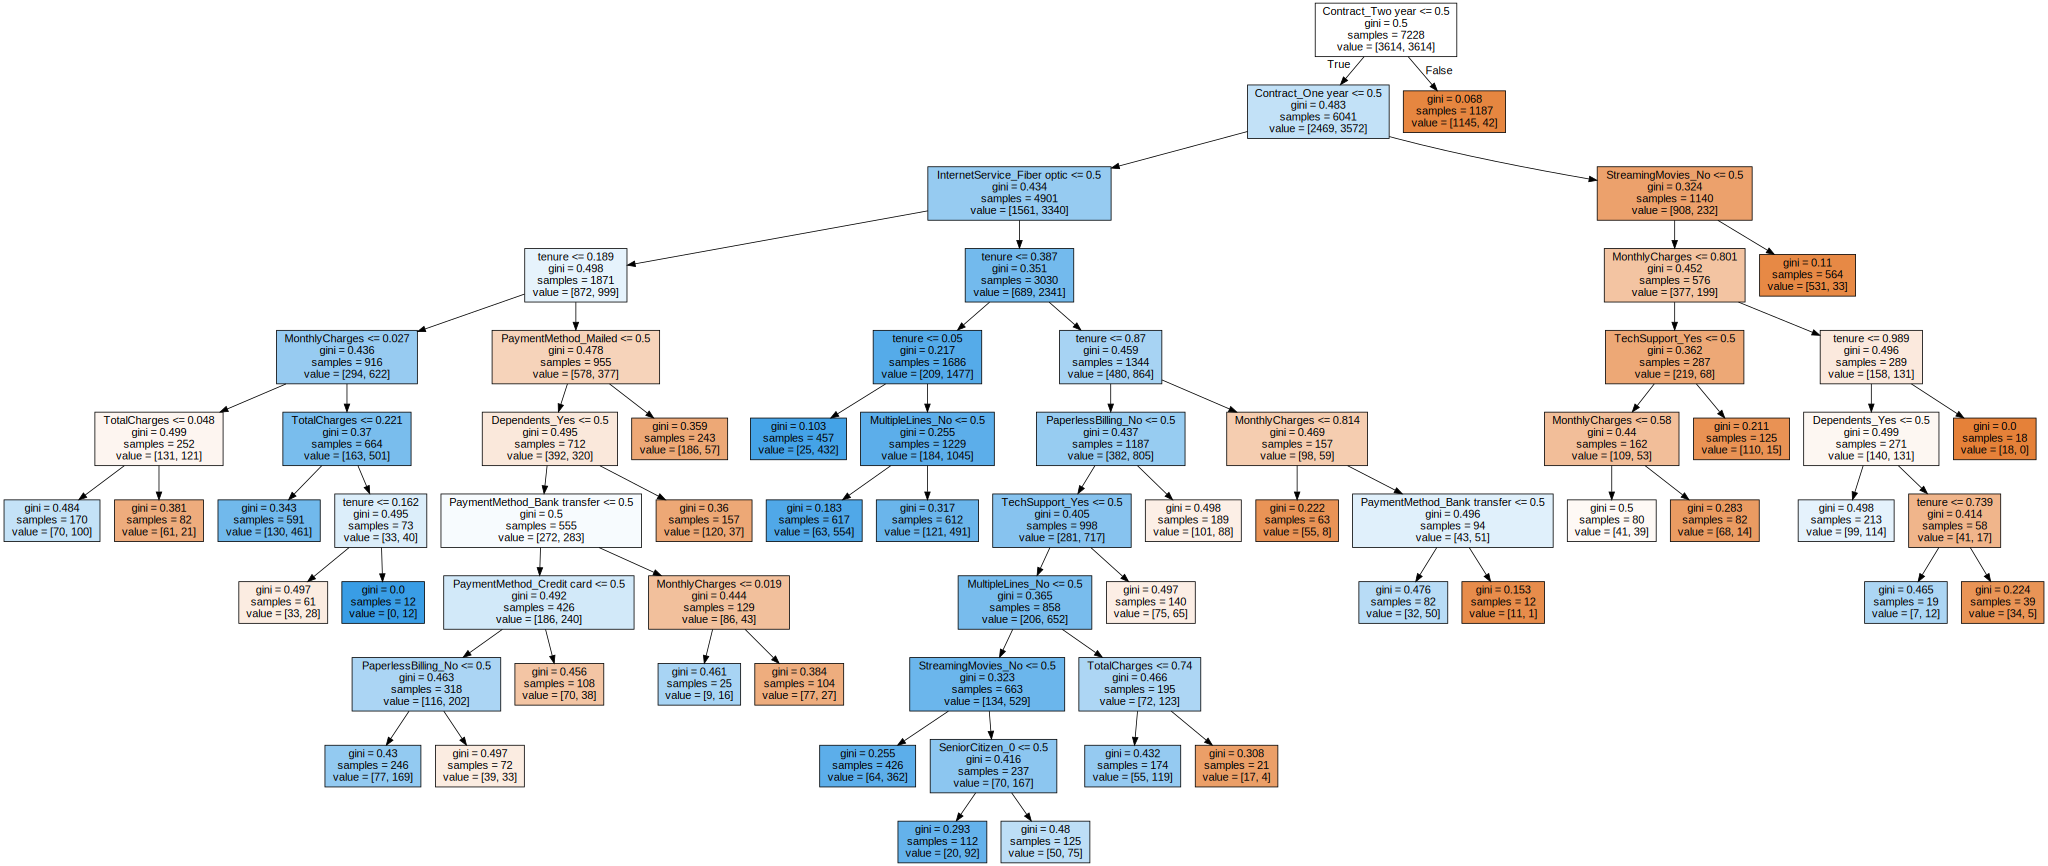

In [64]:
tree_dot = export_graphviz(dt.best_estimator_, out_file=None, feature_names=X_train_res.columns, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph

#### Random Forest

In [65]:
warnings.filterwarnings('ignore')
param_grid_rf = {'max_depth':np.arange(2,40,2),
                 'n_estimators': np.arange(10,200,10),
                 'min_samples_leaf': np.arange(2,15,2),
                 'max_leaf_nodes': np.arange(5,50,5)}
rf = RandomForestClassifier(random_state=123)
#rf = GridSearchCV(rf, param_grid_rf, cv = 5, return_train_score=True)
rf = RandomizedSearchCV(rf, param_grid_rf, cv = 5, return_train_score=True, n_jobs=-1, random_state=123, n_iter= 100)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

Best Estimator: RandomForestClassifier(max_depth=38, max_leaf_nodes=45, min_samples_leaf=4,
                       n_estimators=130, random_state=123)


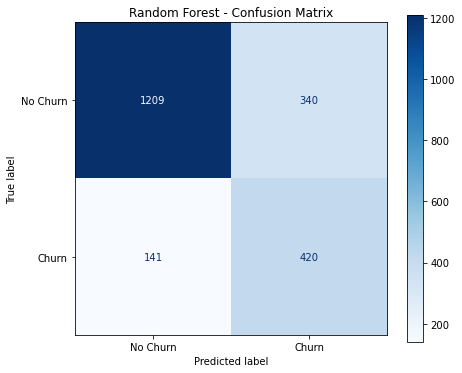

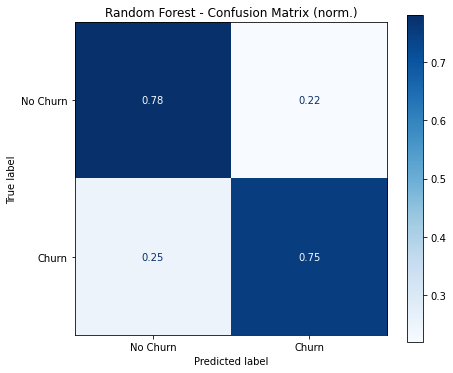

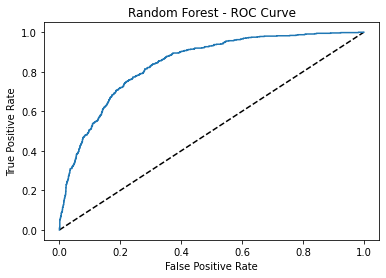

Random Forest Metrics
Accuracy (Train): 0.8183453237410072
Accuracy (Test): 0.7720379146919432
Precision (Test): 0.5526315789473685
Recall (Test): 0.7486631016042781
ROC AUC Score (Test): 0.8411067343775352
F1 Score (Test): 0.6358819076457229
AUC Score (Test): 0.6444843999710338


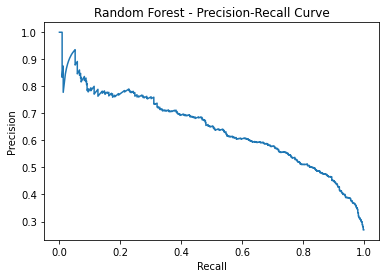

<module 'matplotlib.pyplot' from 'C:\\Users\\vxk200033\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

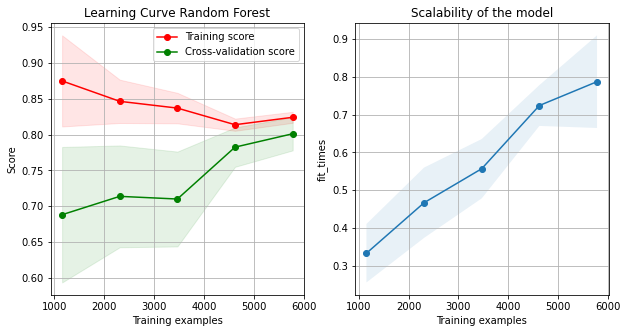

In [66]:
print(f'Best Estimator: {rf.best_estimator_}')
confusion_matrix_plot(X_test, y_test, rf, 'Random Forest')
roc_curve_plot(X_test, y_test, rf, 'Random Forest')
metrics(X_train_res, y_train_res, X_test, y_test, y_pred_rf, y_pred_rf_prob, rf, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')
plot_learning_curve(rf.best_estimator_,'Learning Curve Random Forest',X_train_res,y_train_res,n_jobs=-1)

### Model Comparison

In [67]:
%%capture
knn_metric = metrics(X_train_res, y_train_res, X_test, y_test, y_pred_knn, y_pred_knn_prob, knn, 'KNN')
logreg_metric = metrics(X_train_res, y_train_res, X_test, y_test, y_pred_logreg, y_pred_logreg_prob, logreg, 'Logistic')
dt_metric = metrics(X_train_res, y_train_res, X_test, y_test, y_pred_dt, y_pred_dt_prob, dt, 'Decision Tree')
rf_metric = metrics(X_train_res, y_train_res, X_test, y_test, y_pred_rf, y_pred_rf_prob, rf, 'Random Forest')

In [68]:
metric_table = pd.DataFrame({'KNN':knn_metric,
                             'Logistic Regression':logreg_metric,
                             'Decision Tree':dt_metric,
                             'Random Forest':rf_metric}, index=['Accuracy (Train)', 
                                                                'Accuracy (Test)', 
                                                                'Precision (Test)', 
                                                                'Recall (Test)', 
                                                                'ROC AUC Score (Test)', 
                                                                'F1 Score (Test)', 
                                                                'AUC Score (Test)'])

In [69]:
metric_table

,KNN,Logistic Regression,Decision Tree,Random Forest
Accuracy (Train),0.903708,0.801051,0.809491,0.818345
Accuracy (Test),0.714218,0.773934,0.753081,0.772038
Precision (Test),0.473350,0.555703,0.526316,0.552632
Recall (Test),0.664884,0.746881,0.713012,0.748663
ROC AUC Score (Test),0.748096,0.841707,0.819624,0.841107
F1 Score (Test),0.553002,0.637262,0.605602,0.635882
AUC Score (Test),0.570317,0.651886,0.634402,0.644484
